<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdution to Neural Network Classification in TensorFlow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [5]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Visualizing our Data

In [7]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


from matplotlib import pyplot as plt
_df_0['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X1', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:

# Check out the different labels
circles.label.value_counts()


1    500
0    500
Name: label, dtype: int64

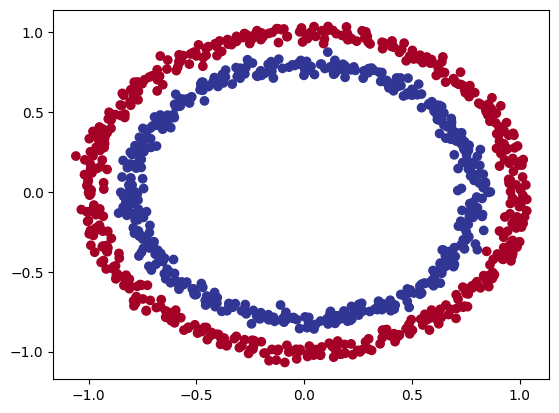

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [10]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# How many samples are we working on?
len(X), len(y)

(1000, 1000)

In [12]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
* 1. Creating a model
* 2. Compiling the model
* 3. Fitting the model
* 4. Evaluate the model

In [13]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model

model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0) # set verbose=0 to make the output print less


# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934813857078552, 0.5]

## Improving the model

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5060


[0.7007994651794434, 0.5059999823570251]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


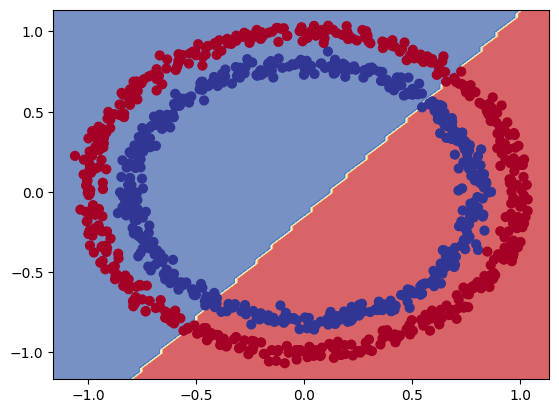

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [18]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate some sample regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split the data into train and test sets
X_reg_train = X_regression[:150].reshape(-1, 1)  # Reshape to make it 2D
X_reg_test = X_regression[150:].reshape(-1, 1)
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Import Sequential and Dense from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_3 = Sequential([
    Dense(64, input_shape=(1,), activation='relu'),  # Input shape is 1D
    Dense(1)  # Output layer for regression
])

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)


Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 265653.0000
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 245654.5312
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 227999.3281
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 210828.9531
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 194401.8438
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 178510.0781
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 163931.4062
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 150723.3594
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 138539.1406
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 126534.3828
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 115181.6562
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 104464.9219
E

In [19]:
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 355.5128 - mae: 355.5128
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 285.1473 - mae: 285.1473
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 262.9552 - mae: 262.9552
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 255.5834 - mae: 255.5834
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 262.6313 - mae: 262.6313
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 261.4273 - mae: 261.4273
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 254.5762 - mae: 254.5762
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 253.0793 - mae: 253.0793
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.7281 - mae: 258.7281
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 257.2710 - mae: 257.2710
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 6ms/step


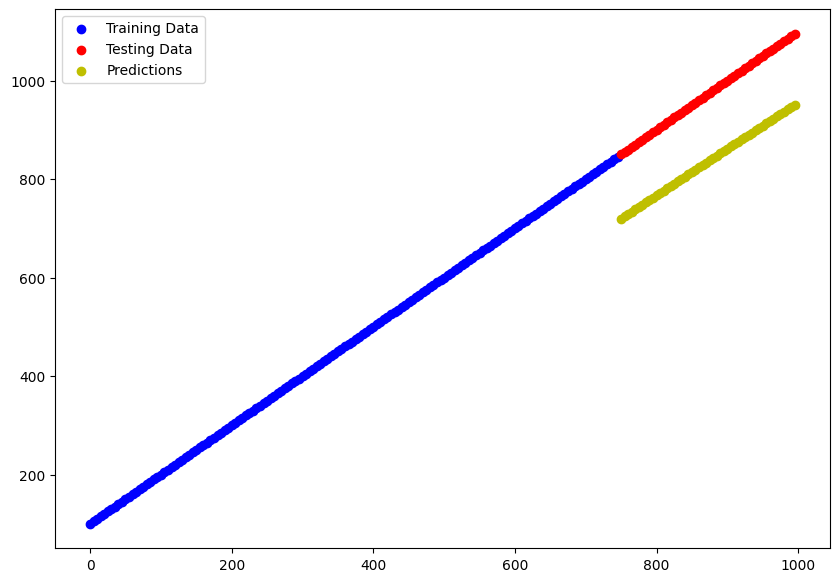

In [21]:
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Testing Data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='y', label='Predictions')
plt.legend();

The missing piece: Non-linearity

In [22]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2833 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1194 - accuracy: 0.4250
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0499 - accuracy: 0.4140
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9375 - accuracy: 0.4150
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8553 - accuracy: 0.4130
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8150 - accuracy: 0.4120
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7248 - accuracy: 0.4120
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5683 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 3.5417 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 3.5116 - accuracy: 0.4190
Epoch 11/

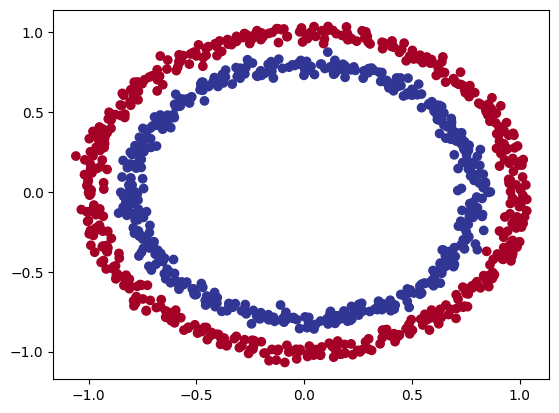

In [23]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


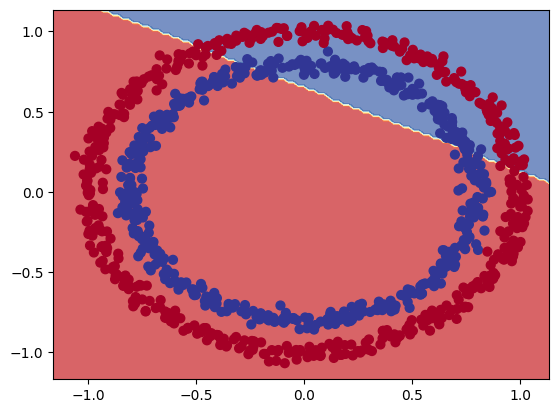

In [24]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Building the neural network with a non-linear function

In [25]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.4287 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4272 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4173 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4142 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4133 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4126 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4119 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4113 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4108 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.4100 - accuracy: 0.4840
Epoch 11/

Upgrading our non-linear model with more layers

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 1.2461 - accuracy: 0.4260
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9931 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9451 - accuracy: 0.4550
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9089 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8566 - accuracy: 0.4530
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8366 - accuracy: 0.4550
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8203 - accuracy: 0.4550
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8061 - accuracy: 0.4550
Epoch 11/

In [27]:

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.5780


[0.6441423892974854, 0.578000009059906]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


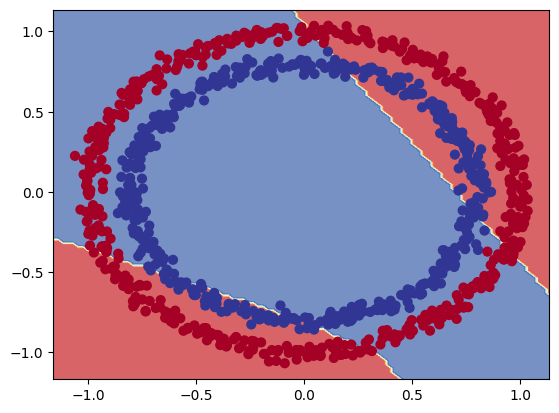

In [28]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [30]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.9650


[0.3140195310115814, 0.9649999737739563]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


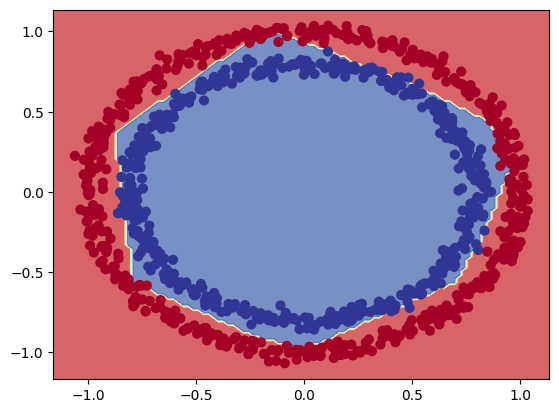

In [31]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [32]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

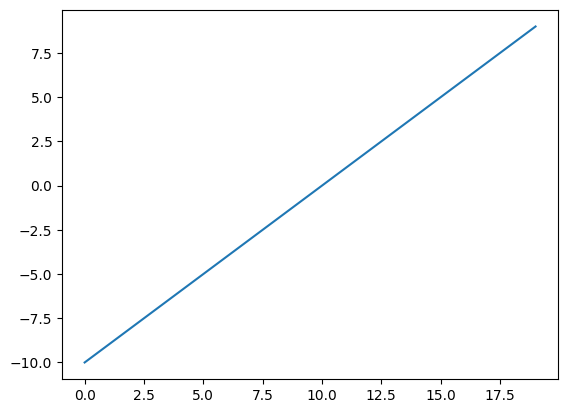

In [33]:
# Visualize our toy tensor
plt.plot(A);

In [34]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

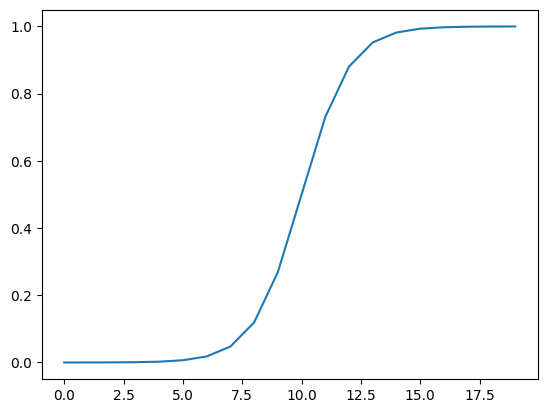

In [35]:
plt.plot(sigmoid(A));

In [36]:
# ReLU
def relu(x):
  return tf.maximum(0, x)
# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

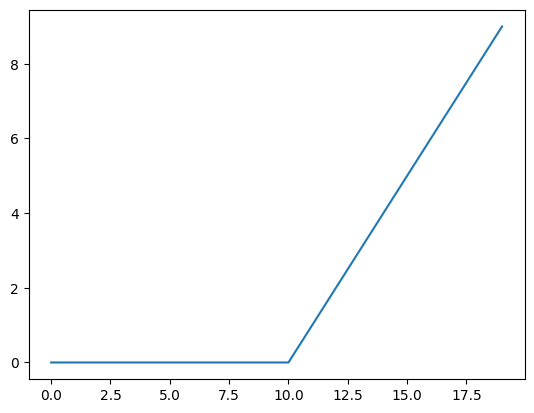

In [37]:
plt.plot(relu(A))

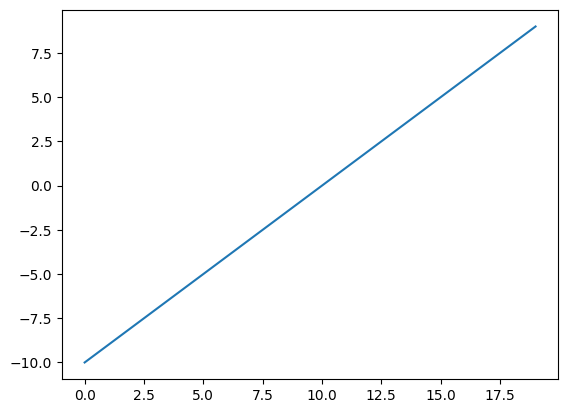

In [38]:
# Linear
plt.plot(tf.keras.activations.linear(A));

In [39]:
# How many examples are in the whole dataset?
len(X)

1000

In [40]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [41]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.7241 - accuracy: 0.4688
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.7018 - accuracy: 0.4275
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4675
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4725
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5100
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5100
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5312
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.5537
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.5725
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6012
Epoch 11/25
25/25 [

In [42]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.9100
Model loss on the test set: 0.30772989988327026
Model accuracy on the test set: 91.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation
313/313 [==============================] - 0s 1ms/step
doing binary classifcation


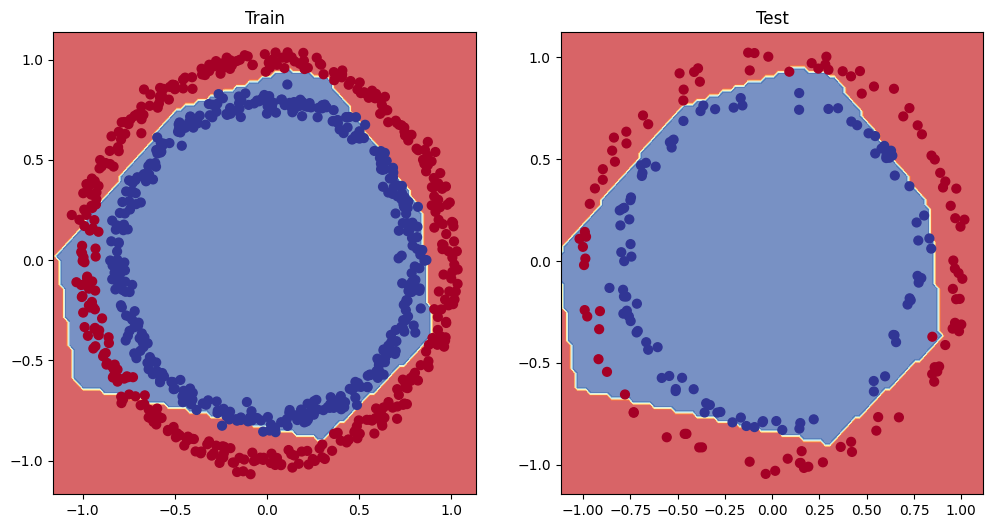

In [43]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [44]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.724056,0.46875
1,0.701791,0.42750
2,0.696853,0.46750
3,0.692346,0.47250
4,0.689415,0.51000
5,0.686649,0.51000
6,0.683130,0.53125
7,0.677637,0.55375
8,0.668490,0.57250
9,0.656835,0.60125


from matplotlib import pyplot as plt
_df_8['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Model_8 training curves')

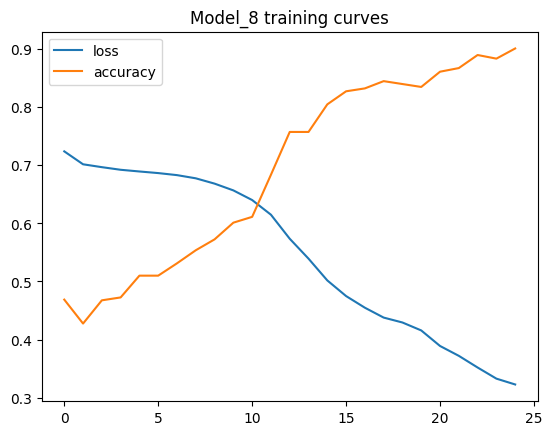

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best learning rate

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# FIt the the model
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.8706 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8645 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8511 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8437 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8361 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8278 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8193 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

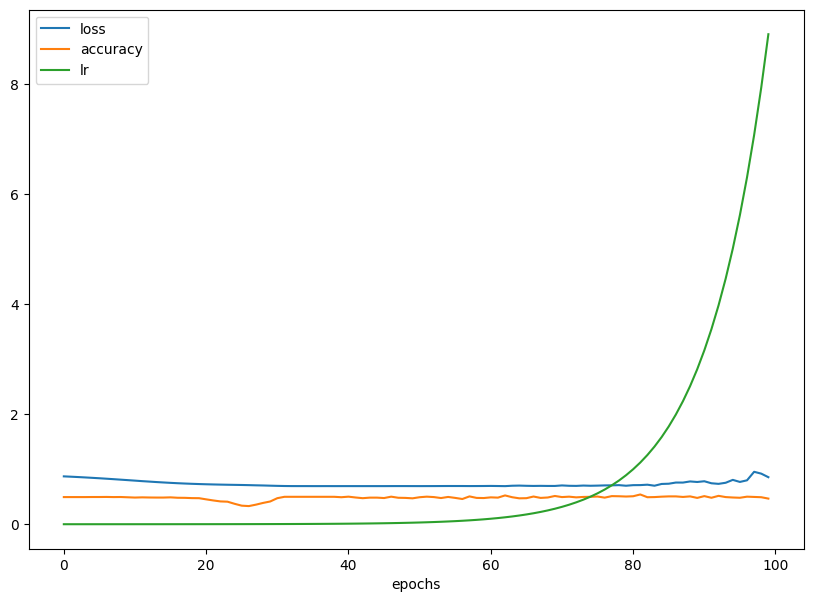

In [47]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

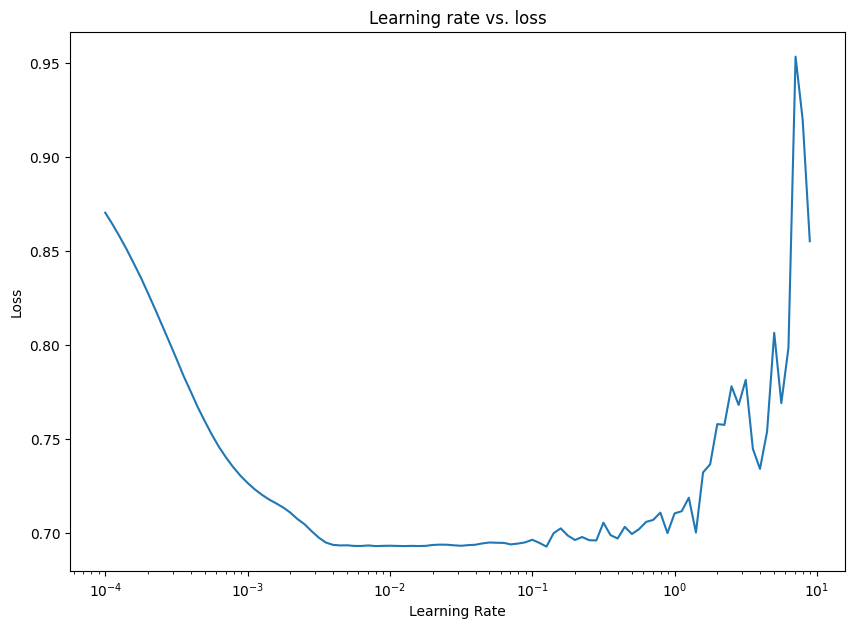

In [48]:
# plot the lr vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [49]:
len(lrs)

100

In [69]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5713
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5450
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6200
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6225
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6750
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7850
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7788
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.8363
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8500
Epoch 11/20
25/25 [

With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [70]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9750


[0.09244126081466675, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation
313/313 [==============================] - 1s 2ms/step
doing binary classifcation


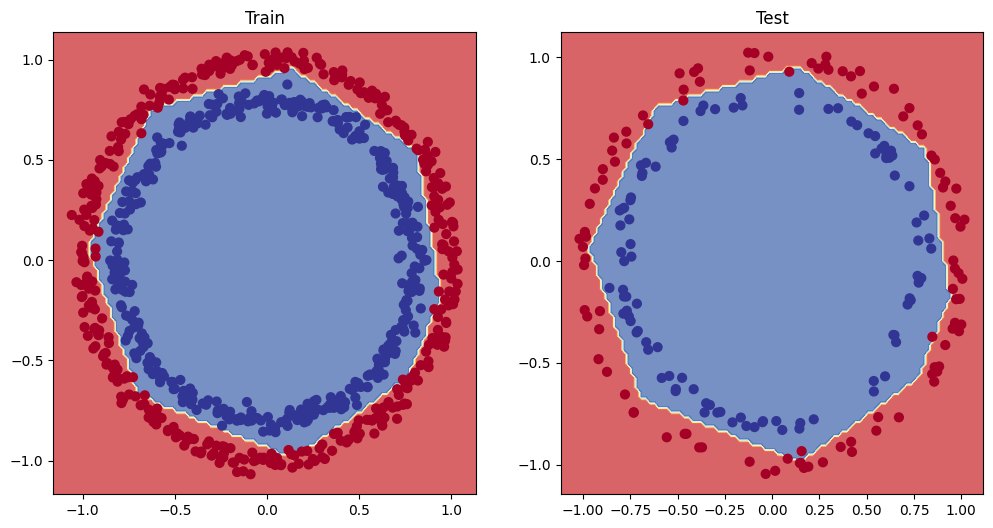

In [71]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [72]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9750


[0.09244126081466675, 0.9750000238418579]

In [73]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.9100


[0.30772989988327026, 0.9100000262260437]

In [74]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9750
Model loss on test set: 0.09244126081466675
Model accuracy on test set: 97.50%


In [75]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[96,  5],
       [ 0, 99]])

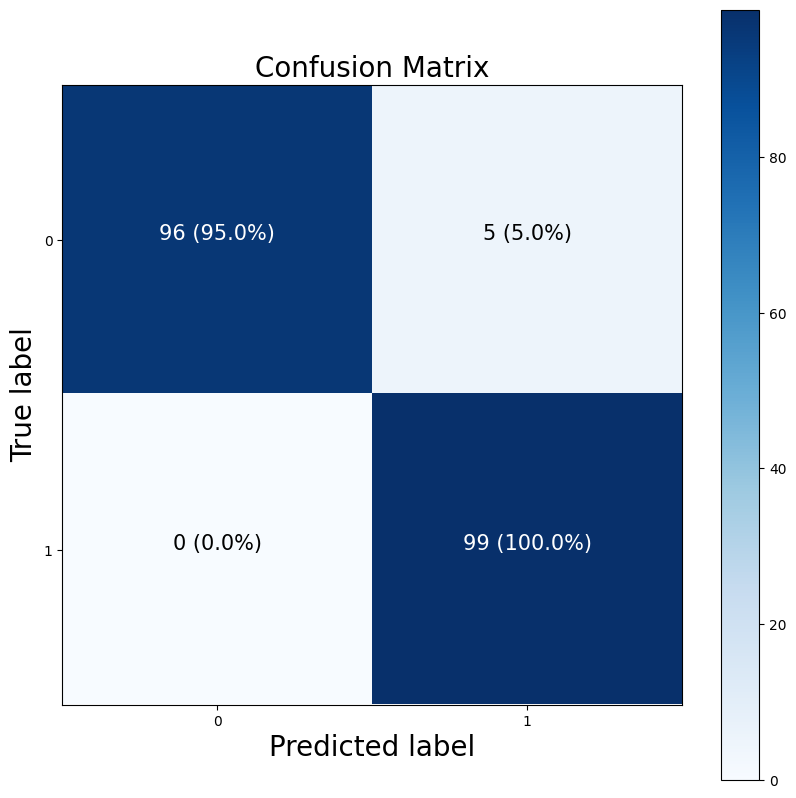

In [76]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass classification)

In [58]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [59]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [60]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [61]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

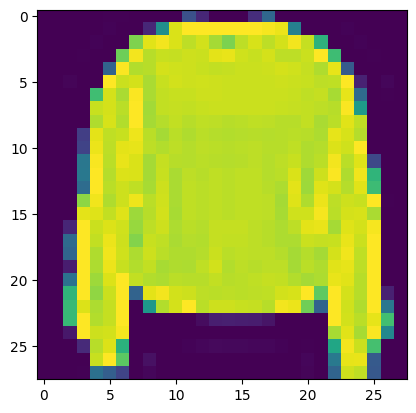

In [62]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [63]:
train_labels[7]

2

In [64]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

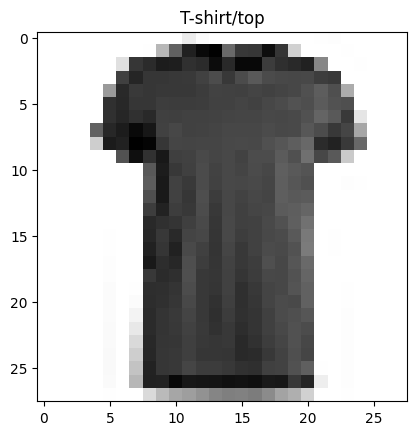

In [65]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

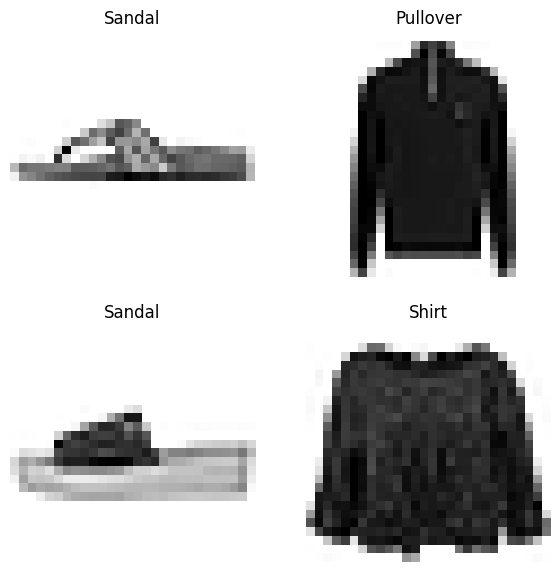

In [66]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [67]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.4570 - accuracy: 0.0993 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2976 - accuracy: 0.1024 - val_loss: 2.1012 - val_accuracy: 0.1678
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7846 - accuracy: 0.2643 - val_loss: 1.6502 - val_accuracy: 0.3088
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6022 - accuracy: 0.3027 - val_loss: 1.5473 - val_accuracy: 0.2952
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5078 - accuracy: 0.3147 - val_loss: 1.4902 - val_accuracy: 0.3334
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4615 - accuracy: 0.3529 - val_loss: 1.4568 - val_accuracy: